# Simple advection diffusion model for tracer transport model in a stratified ocean

In [38]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

$$
\frac{dT}{dt} = -\mathbf{v}\cdot\nabla T + \kappa \nabla^2 T
$$

See detailed numerics here: https://computationalthinking.mit.edu/Fall23/climate_science/advection_and_diffusion/

In [132]:
def advection(T, dx, U):
    dT = np.zeros(len(T))  # create new vector of the same length
    
    for i in range(1,len(T)-1):
        dT[i] = U * (T[i+1] - T[i-1]) / (2*dx)

    # periodic boundary:
    dT[0] = U * (T[1] - T[-1]) / (2*dx)
    dT[-1] = U * (T[0] - T[-2]) / (2*dx)

    return dT

In [134]:
def diffusion(T, dx, D):
    dT = np.zeros(len(T))  # create new vector of the same length

    for i in range(1,len(T)-1):
        dT[i] = D * (T[i+1] - 2*T[i] + T[i-1]) / (dx**2)

    # periodic boundary:
    dT[0] = D * (T[1] - 2*T[0] + T[-1]) / (dx**2)
    dT[-1] = D * (T[0] - 2*T[-1] + T[-2]) / (dx**2)

    return dT

In [136]:
def f_advectiondiffusion(T,t,dx=0.05,U=1,D=0.01):
    return advection(T,dx,U) + diffusion(T,dx,D)

In [138]:
def solve_advectiondiffusion(T0,dt,t_total,dx=0.05,U=1,D=0.01):
    t = np.linspace(0,t_total,int((t_total/dt) + 1))
    T = odeint(f_advectiondiffusion, T0, t, args=(dx,U,D))
    return T,t

In [158]:
dt,dx = 0.01,0.05
t_total = 10
xs = np.arange(0.025,0.975,dx)
T0 = np.sin(2*np.pi * xs) + 2*np.cos(4*np.pi * xs) + 0.2

T,t = solve_advectiondiffusion(T0,dt,t_total,U=1,D=0.001)

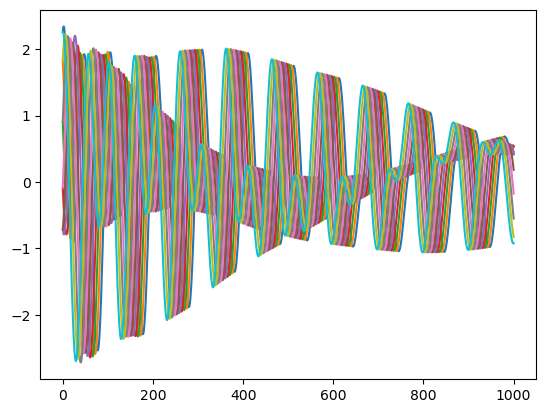

In [160]:
plt.plot(T[:,0:10:])